# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing the data

In [6]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


The features of the dataset :
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 

In [7]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


# Null values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Features of various attributes

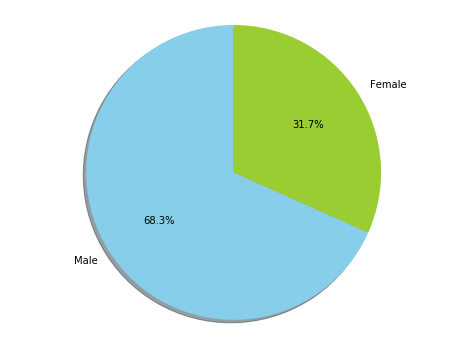

In [9]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()


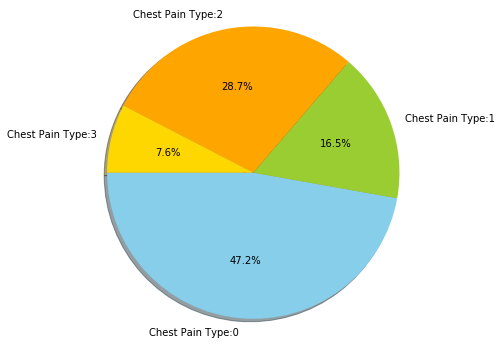

In [10]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()


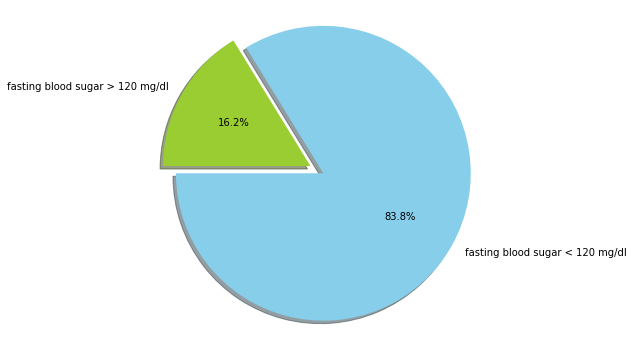

In [11]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

# EDA

In [12]:
sns.set_style('whitegrid')


Heat map

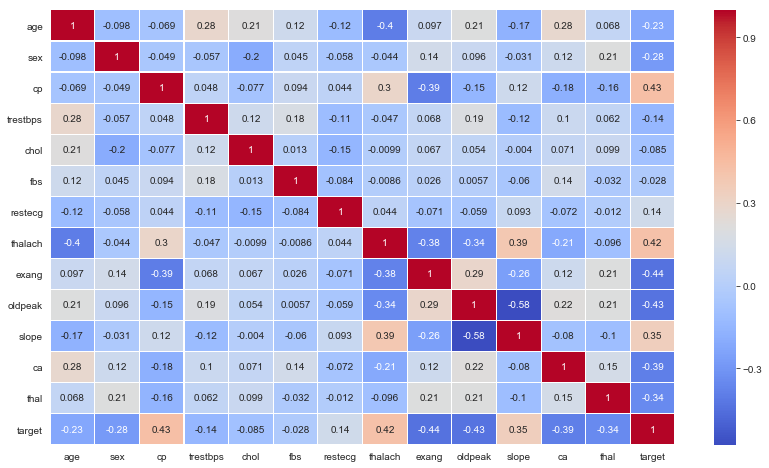

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Distribution

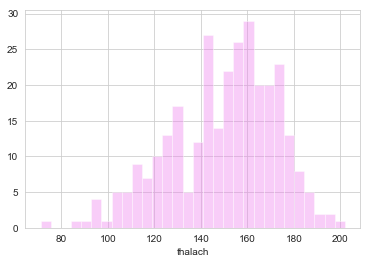

In [14]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

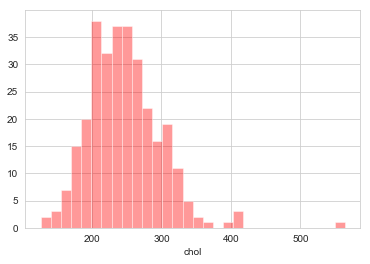

In [15]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

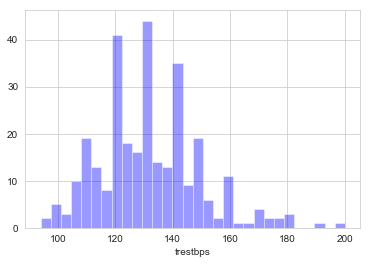

In [16]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

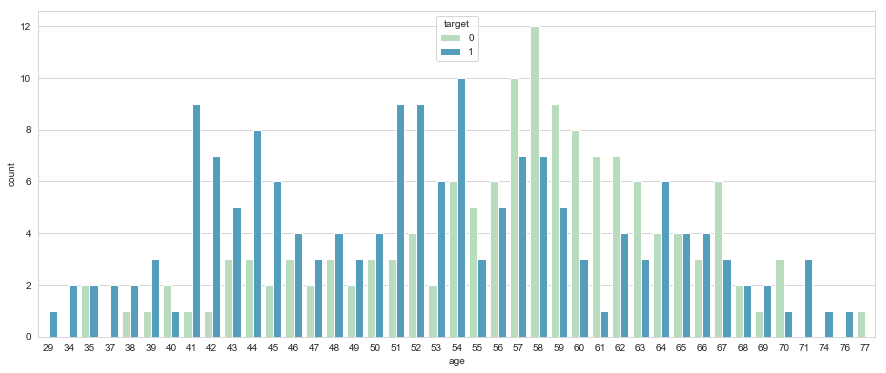

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

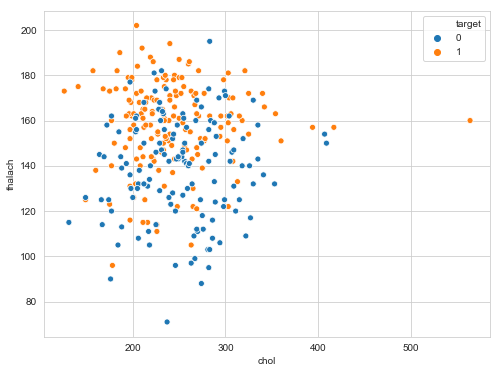

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

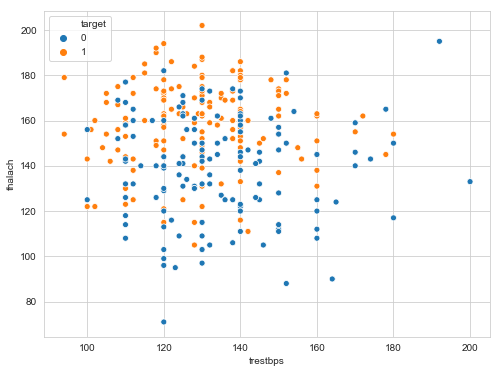

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

# Model Building

In [20]:
X= df.drop('target',axis=1)
y=df['target']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#  KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}


In [25]:
model = GridSearchCV(knn,params,cv=10)

In [27]:
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 17}

In [28]:
predict = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8461538461538461
Using k-NN we get an accuracy score of:  84.615 %


In [33]:
from sklearn.metrics import classification_report


In [34]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.86      0.78      0.82        41
          1       0.83      0.90      0.87        50

avg / total       0.85      0.85      0.85        91



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [36]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [37]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [38]:
predict = log_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [40]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        41
          1       0.84      0.84      0.84        50

avg / total       0.82      0.82      0.82        91

